# Random Walk

- author - Siva Renganathan

In [13]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import numpy as np


## Definition

Suppose $(Z_1, Z_2, ... Z_{k-1}, Z_k ...)$ is an infinite sequence of $R^D$ valued i.i.d random variables.

We define the random walk $(X_n)_{n \in N}$ starting at $X_0$ as,

i.e $X_n = X_0 + \sum\limits_{i=1}^{n}Z_i; \forall n \ge 1$

Each of the quantities $(Z_i)$ are called steps of the random walk

The value $X_n$ specifies the position reached at timestep $n$
<br>
<br>
<br>
<br>

### Formulation

Consider a Random Walk with starting point $X_0$ and let the random variable $Z$ follows the distribution,

$$
P(Z=1) = p
\\
P(Z=-1) = q
$$

#### Expectation

$$
E[X_n] = E[X_0 + \sum_{i=1}^{n}Z_i]
$$

Using linearity,

$$
E[X_n] = X_0 + \sum_{i=1}^{n}E[Z_i]
$$

$$
E[Z_i] = 1.p + (-1).q = p - q
$$

$$
E[X_n] = X_0 + n(p - q)
$$

If $p \gt q$ expectation grows over time.

If $p \lt q$ expectation shrinks over time. (grows in the negative direction)

If $p = q$ expectation is zero. (remains constant)
<br>
<br>

#### Expectation of Squared Random Walk

$$
E[X_n^2]= E[(X_0 + \sum_{i=1}^{n}Z_i)^2] = E[X_0^2 + (\sum_{i=1}^{n}Z_i)^2 + 2X_0.\sum_{i=1}^{n}Z_i]
$$

We know, $E[Z_i] = 0$

$$
E[Z_i^2] = p(1)^2 + q.(-1)^2 = p + q
$$

Using linearity as above,

$$
E[X_n^2] = X_0^2 + \sum_{i=1}^{n}E[Z_i^2] = X_0^2 + n(p + q)
$$


#### Variance

$$
Var[X_n] = Var[X_0 + \sum_{i=1}^{n}Z_i]
$$

Using translation invariance $Var(a+X) = Var(X)$

$$
Var[X_n] = Var[\sum_{i=1}^{n}Z_i]
$$

Since $Z_i$ is an i.i.d random variable, variance over sum can be decomposed into sum over variances,

$$
Var[X_n] = \sum_{i=1}^{n}Var[Z_i]
$$

$$
Var[Z_i] = E[(Z_i - E[Z_i])^2] = E[Z_i^2] - (E[Z_i])^2 = (p+q)^2 - (p-q)^2 = 2p.2q = 4pq
$$

$$
Var[X_n]= \sum_{i=1}^{n}Var[Z_i] = 4npq
$$

Therefore the variance grows over time unless p is 0 or 1


In [2]:
def RandomWalk(dist, n, x0):
    """
    Create a random walk starting at x0

    @param dist: The distribution function of the random variable Z
    @param n: No: of timesteps
    @param x0: Starting point of the random walk
    
    @returns List[n+1]; where List[i] = position at timestep i
    """
    
    z = np.array([dist() for _ in range(n)])
    return np.cumsum(np.concatenate((x0, z), axis=0))


## Rademacher Distribution - Simple Symmetric Random Walk

The PMF for a random variable $Z$ following the rademacher distribution is defined by 

$$P(Z) = 
\begin{cases}
\dfrac{1}{2}& Z = 1
\\
\\
\dfrac{1}{2}& Z = -1
\\
\\
0& Z \neq [-1, 1]
\end{cases}
$$

Random walk where $X_0=0$ and steps follow a rademacher distribution is called a simple symmetric random walk

### Expectation

$$
E[X_n] = X_0 + n(p - q)
$$
$$
\\
subst\ X_0=0, p=q=\dfrac{1}{2}
\\
E[X_n] = 0
$$

### Expectation of Squared Simple Symmetric Random Walk

$$
E[X_n^2] = X_0 + n(p + q)
$$
$$
\\
subst\ X_0=0, p=q=\dfrac{1}{2}
\\
E[X_n^2] = n
$$


### Variance

$$
Var[X_n] = 4npq
$$
$$
\\
subst\ X_0=0, p=q=\dfrac{1}{2}
\\
Var[X_n] = n
$$

Even for the simple symmetric random walk, the variance grows over time, so it'll be harder to predict the position



In [3]:
def Rademacher():
    return np.random.choice([-1, 1])


In [80]:
def SimpleSymmetricRandomWalk(n, x0=np.array([0])):
    return RandomWalk(Rademacher, n, x0)


In [79]:
def Average(walk):
    return round(np.mean(walk), 3)


In [6]:
def Variance(walk):
    return round(np.var(walk), 3)


In [7]:
def Translation(walk, n):
    """
    Compute the displacement from origin

    @param walk: The random walk executed
    @param n: No: of timesteps

    @returns displacement from origin (net translation) 
    """

    return walk[n]



Let's see how this process looks like for 10, 100 and 1000 timesteps

In [86]:
def PlotSimpleSymmetricRandomWalk(walk, n):
    fig = plt.figure(figsize=(12,6))
    fig.suptitle(
        f"Simple Symmetric Random Walk, n={n}" + "\n" + \
        f"Avg = {Expectation(walk)}, Var[X] = {Variance(walk)}" + "\n" + \
        f"Translation = {walk[n]}",
        fontsize=12)
    plt.xlabel("Timesteps")
    plt.ylabel("X [n]")
    for x, val in enumerate(walk):
        plt.hlines(val, x, x+1, color='black', lw=2)
        if x >= 1:
            plt.vlines(x, walk[x-1], val, color='r', linestyles='dotted', lw=1)
    plt.show()


In [83]:
walk10 = SimpleSymmetricRandomWalk(10)
walk10


array([ 0, -1,  0, -1,  0,  1,  2,  3,  2,  3,  2])

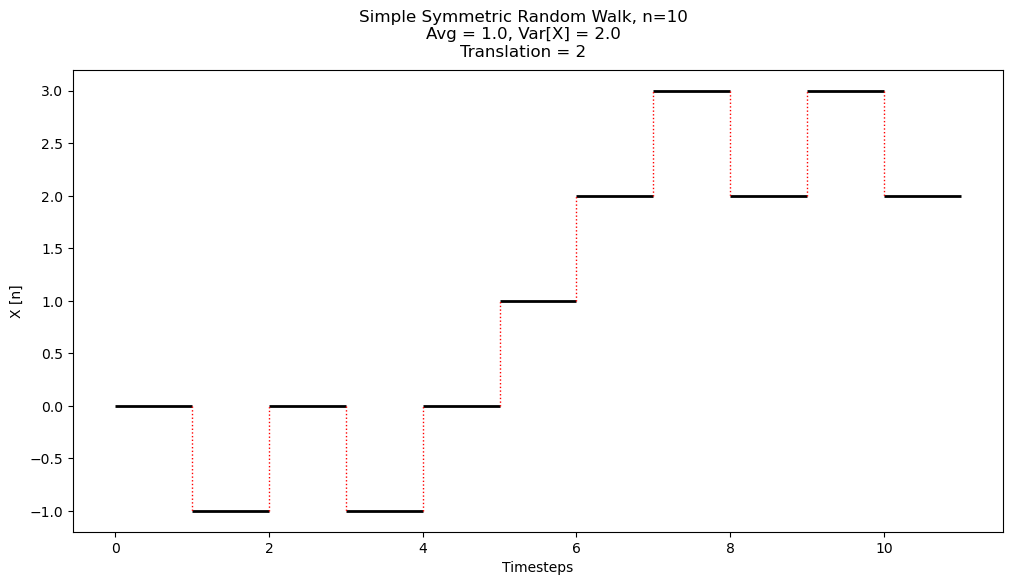

In [87]:
PlotSimpleSymmetricRandomWalk(walk10, 10)


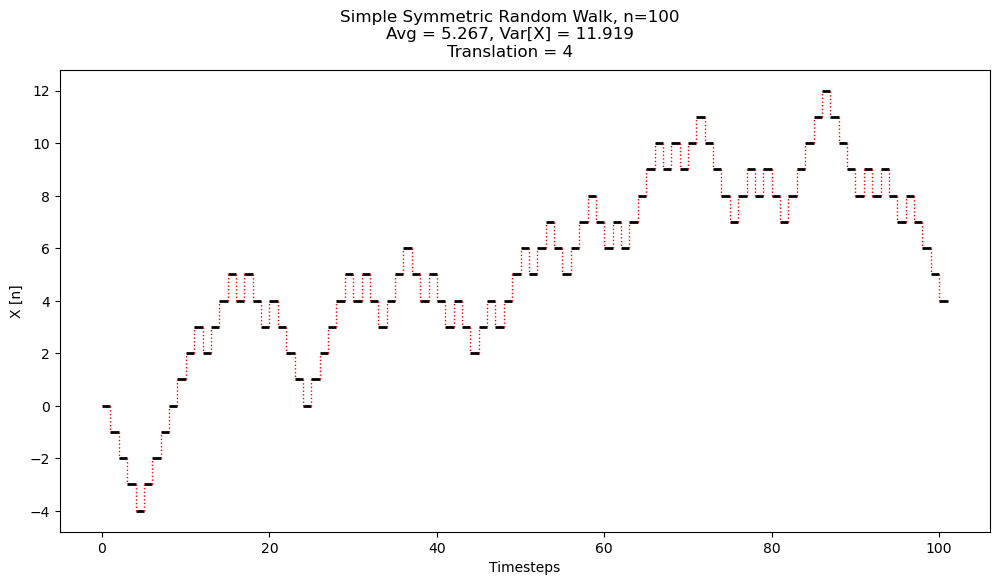

In [88]:
walk100 = SimpleSymmetricRandomWalk(100)
PlotSimpleSymmetricRandomWalk(walk100, 100)


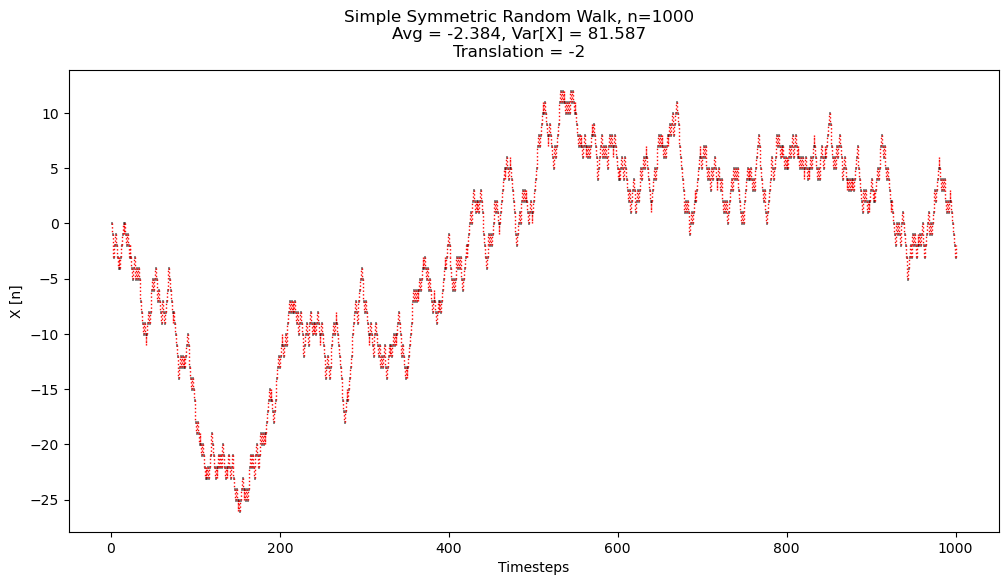

In [90]:
walk1000 = SimpleSymmetricRandomWalk(1000)
PlotSimpleSymmetricRandomWalk(walk1000, 1000)


## Exact Distribution of a Simple Symmetric Random Walk

In $n$ timesteps, let's assume we went $k$ steps up and $l$ steps down

$$
k + l = n
\\
t = k - l
$$

The position at timestep $n, X_n$,  is given by,

$$
X_n = k - l = 2k - n
$$

Since the movement is symmetric, the position can be computed by just knowing the no: of upward or downward steps, i.e the count of $\#[Z_i=1]$ or $\#[Z_i=-1]$ respectively

Let $S_n$ be a sequence of the random walk at timestep $n$

At timestep $n, S_n$ is any combination consisting of $[-1, 1]$ i.e $S_n = (Z_0,Z_1,Z_2 ... Z_{n-1})$ with the probability $\dfrac{1}{2^n}$

No: of sequences with $k$ jumps i.e $\#[Z_i=1]=k$ in a sequence of length $n$ is given by the combination

$$
n(\#[Z_i=1]=k) = \dbinom{n}{k}
$$


$$
P(Y_n=k) = \dfrac{1}{2^n}\dbinom{n}{k}
$$

$$
P(X_n=2k-n) = P(Y_n=k) = \dfrac{1}{2^n}\dbinom{n}{k}
$$

$$
i = 2k - n \implies k = \dfrac{n + i}{2}
$$

$$
P(X_n=i) = \dfrac{1}{2^n}\dbinom{n}{\dfrac{n + i}{2}}
$$

Therefore $(P[X_n=i])$ follows a binomial distribution with $p = \dfrac{1}{2}, q = \dfrac{1}{2}, n[success]=\dfrac{n+i}{2}$


In [149]:
def Distribution(walk):
    """
    Compute the distribution P[Xn=i]
    i.e the probability of the walk being at position i
    after n timesteps, i=2k-n, k, no: of upward steps.

    @param walk: The random walk

    @returns P(Xn=i)
    """

    n = len(walk)
    p = []
    
    binom = lambda n, k: math.comb(n, k) / (2 ** n)
    for i in range(-(n+1), n+1):
        if i % 2 == n % 2:
            p.append((i, (binom(n, (n+i) // 2))))
    return p


In [126]:
def PlotDistribution(dist):
    fig = plt.figure(figsize=(12,6))
    fig.suptitle(
        f"Simple Symmetric Random Walk Distribution Plot", 
        fontsize=12)
    plt.xlim(dist[0][0], dist[-1][0])
    plt.xlabel("Position")
    plt.ylabel("P[Xn]")
    for t, px in dist:
        plt.vlines(t, 0, px, color='b', lw=15)
    plt.show()


Now let's visualise the distribution of $P(X_n=t)$ for random walk of 10 and 100 timesteps


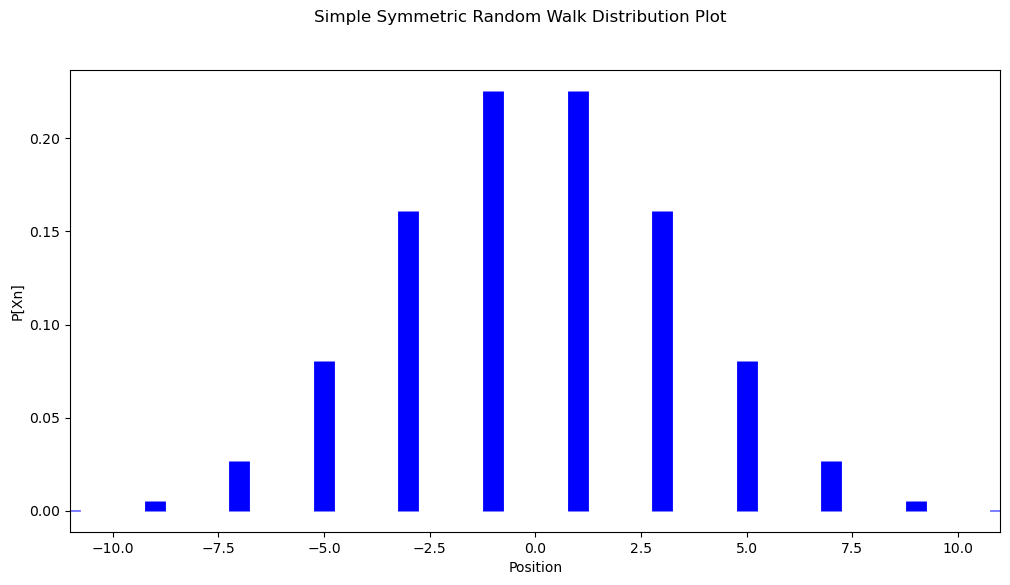

In [150]:
dist10 = Distribution(walk10)
PlotDistribution(dist10)


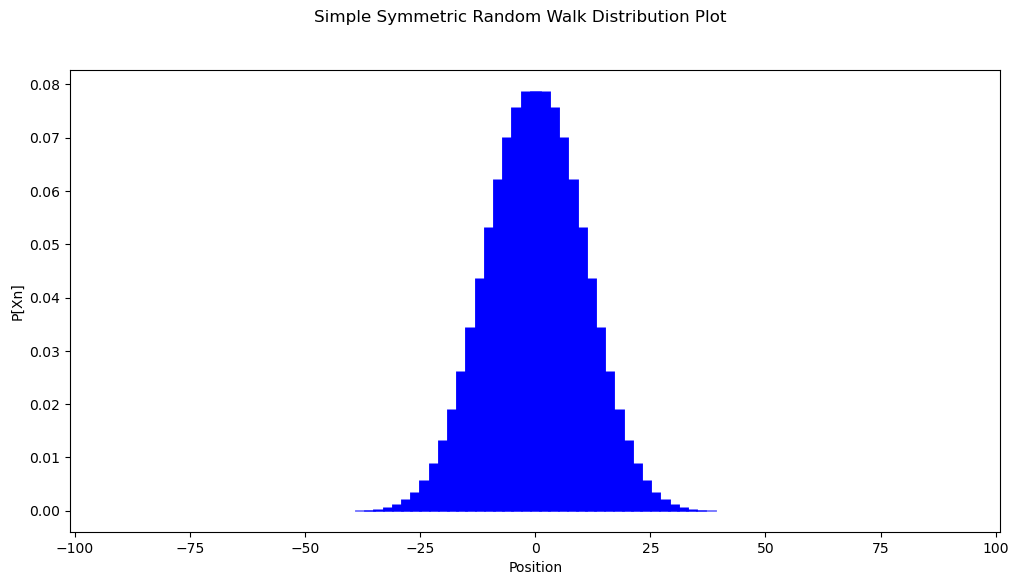

In [151]:
dist100 = Distribution(walk100)
PlotDistribution(dist100)


## Deriving Expectation and Variance from Distribution

We know for a binomial distribution,

Note (Expectation and Variance is w.r.t to $Y_n$, the no: of upward jumps)

#### Expectation

$$
E[Y_n] = np = \dfrac{n}{2}
$$

$$
E[X_n] = E[2Y_n - 1] = 2.E[Y_n] = E[1] = 2.\dfrac{n}{2} - n \implies E[X_n] = 0
$$

#### Variance

$$
Var[Y_n] = np(1-p) = \dfrac{n}{4}
$$

$$
Var[X_n] = Var[2Y_n - 1] = 4Var[Y_n] \implies Var[X_n] = n 
$$

In [157]:
def ExpVarDist(dist):
    """Compute expectation and variance from distribution

    @param dist: Tuple [i, P[Xn=i]], the position and distribution

    @returns: E[Xn], E[Xn^2] and Var[Xn]
    """

    x, p = list(zip(*dist))[:]
    xsq = [j ** 2 for j in x]
    exp = sum([i * j for i, j in zip(x, p)])
    expsq = sum([a * b for a, b in zip(xsq, p)])
    var = expsq - exp ** 2
    return f"E[Xn]={exp}, E[Xn^2]={expsq}, Var[Xn]={var}"



In [158]:
print(f"Distribution 10: {ExpVarDist(dist10)}")
print(f"Distribution 100: {ExpVarDist(dist100)}")


Distribution 10: E[Xn]=0.0, E[Xn^2]=11.0, Var[Xn]=11.0
Distribution 100: E[Xn]=3.6568603566836137e-16, E[Xn^2]=100.99999999999999, Var[Xn]=100.99999999999999
